# Take home exam

## Alena Sokolyanskaya

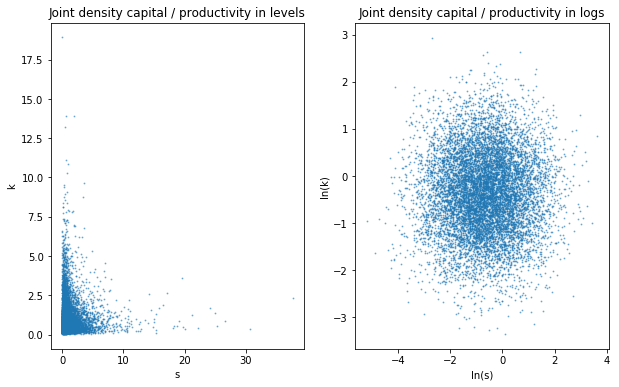

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Question 1. CORRELATION = 0 

## 1.1
## since mean of s and k is 1, then logs are equal to 0, so we numerically solve to find means
gamma = 0.5
cov = [[1.416,0],[0,0.749]]
mean_ln_s=-0.708
mean_ln_k=-0.374

for i in range(1000):
    mean = [mean_ln_s,mean_ln_k]
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T   
    s = np.e**ln_s
    k = np.e**ln_k
    
    if np.mean(s)>1:
        mean_ln_s = mean_ln_s-0.0001
    else:
        mean_ln_s = mean_ln_s+0.0001
        
    mean = [mean_ln_s,mean_ln_k]
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T    
    s = np.e**ln_s
    k = np.e**ln_k 
       
    if np.mean(k)>1:
        mean_ln_k = mean_ln_k-0.00001
    else:
        mean_ln_k = mean_ln_k+0.00001     
        
s = np.e**ln_s
k = np.e**ln_k
np.mean(s) # almost 1
np.mean(k) # almost 1

plt.figure(1)
plt.subplot(121)
plt.scatter(s,k, s=0.8, alpha=0.5)
plt.xlabel("s")
plt.ylabel("k")
plt.title('Joint density capital / productivity in levels')

plt.subplot(122)
plt.scatter(ln_s,ln_k, s=0.8, alpha=0.5)
plt.xlabel("ln(s)")
plt.ylabel("ln(k)")
plt.title('Joint density capital / productivity in logs')
plt.rcParams["figure.figsize"] = (8,6)

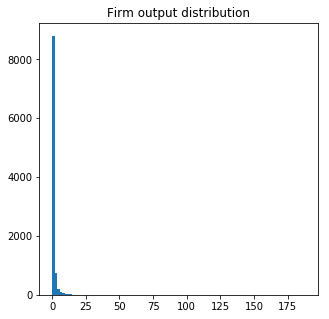

In [40]:
## 1.2
y = s*k**gamma
Y = sum(y)
plt.hist(y, bins=100)
plt.title("Firm output distribution")
plt.rcParams["figure.figsize"] = (5,5)

In [41]:
## 1.3
i=0
K = sum(k)
k_opt = [0]*10000
for i in range(10000):
    k_opt[i]= K/ sum( (s[i]/s)**(1/(gamma-1)) )
#k_opt

Solving $ max_{k_i} \sum_i s_i k_i^\gamma $$ s.t.  $$ K = \sum_i k_i $

FOCs:
$ [k_i]: s_i \gamma k_i^{\gamma - 1} = \lambda $
$ [k_j]: s_j \gamma k_j^{\gamma - 1} = \lambda $

Deriving $ k_j = (\frac{s_i}{s_j})^\frac{1}{(\gamma - 1)} k_i $

Since $ k_i = K - \sum_{j \neq i} k_j $ we get that
$ k_i = \frac{K}{( \sum (1 + \frac{s_i}{s_j})^\frac{1}{(\gamma - 1)} + ...)} $

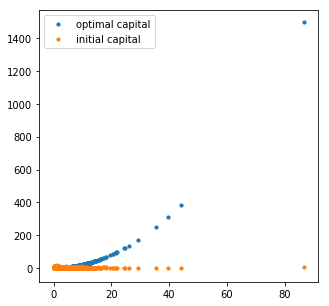

In [42]:
## 1.4 
plt.scatter(s, k_opt,s=10, label="optimal capital")
plt.scatter(s, k,s=10, label="initial capital")
plt.legend()
plt.rcParams["figure.figsize"] = (5,5)

In [23]:
## 1.5
k_opt = np.array(k_opt)
y_opt = s*k_opt**0.5
Y_opt = sum(y_opt)
gain = Y_opt/Y
gain

2.131773197792784

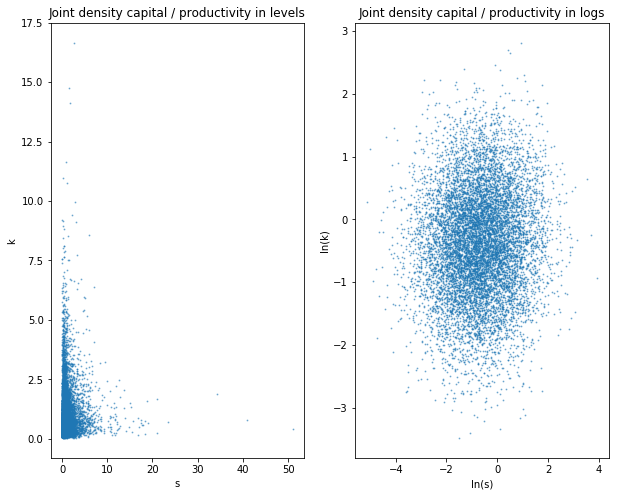

In [45]:
## Question 1. CORRELATION = 0.25

## 1.1
gamma = 0.5
cov = [[1.416,0.25**2],[0.25**2,0.749]] #correcting for new correlation
mean_ln_s=-0.708
mean_ln_k=-0.374

for i in range(1000):
    mean = [mean_ln_s,mean_ln_k]
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T   
    s = np.e**ln_s
    k = np.e**ln_k
    
    if np.mean(s)>1:
        mean_ln_s = mean_ln_s-0.0001
    else:
        mean_ln_s = mean_ln_s+0.0001
        
    mean = [mean_ln_s,mean_ln_k]
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T    
    s = np.e**ln_s
    k = np.e**ln_k 
       
    if np.mean(k)>1:
        mean_ln_k = mean_ln_k-0.00001
    else:
        mean_ln_k = mean_ln_k+0.00001       
s = np.e**ln_s
k = np.e**ln_k

plt.figure(1)
plt.subplot(121)
plt.scatter(s,k, s=0.8, alpha=0.5)
plt.xlabel("s")
plt.ylabel("k")
plt.title('Joint density capital / productivity in levels')

plt.subplot(122)
plt.scatter(ln_s,ln_k, s=0.8, alpha=0.5)
plt.xlabel("ln(s)")
plt.ylabel("ln(k)")
plt.title('Joint density capital / productivity in logs')
plt.rcParams["figure.figsize"] = (10,8)

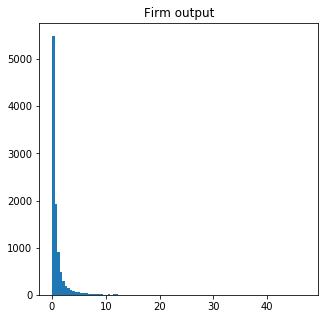

In [47]:
## 1.2
y = s*k**gamma
Y = sum(y)
plt.hist(y, bins=100)
plt.title("Firm output")
plt.rcParams["figure.figsize"] = (5,5)

In [48]:
## 1.3
i=0
K = sum(k)
k_opt = [0]*10000
for i in range(10000):
    k_opt[i]= K/sum( (s[i]/s)**(1/(gamma-1)) )

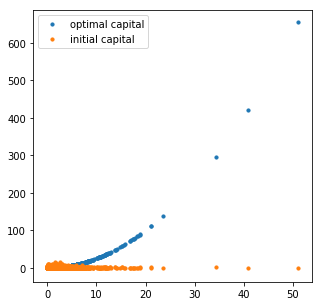

In [49]:
## 1.4 
plt.scatter(s, k_opt,s=10, label="optimal capital")
plt.scatter(s, k,s=10, label="initial capital")
plt.legend()
plt.rcParams["figure.figsize"] = (5,5)

In [50]:
## 1.5
k_opt = np.array(k_opt)
y_opt = s*k_opt**0.5
Y_opt = sum(y_opt)
gain = Y_opt/Y
gain

2.1122507171356553

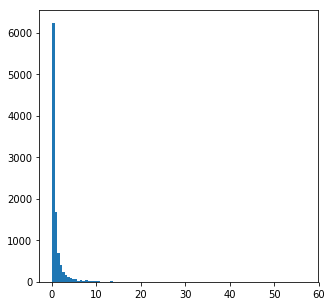

In [51]:
# Question 2
gamma = 0.8
y = s*k**gamma
Y = sum(y)
plt.hist(y, bins=100)
plt.rcParams["figure.figsize"] = (5,5)

In [52]:
## 2.3
i=0
K = sum(k)
k_opt = [0]*10000
for i in range(10000):
    k_opt[i]= K/sum( (s[i]/s)**(1/(gamma-1)) )

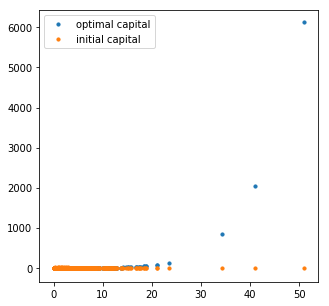

In [53]:
## 2.4
plt.scatter(s, k_opt,s=10, label="optimal capital")
plt.scatter(s, k,s=10, label="initial capital")
plt.legend()
plt.rcParams["figure.figsize"] = (5,5)

In [54]:
# Question 2.5 
k_opt = np.array(k_opt)
y_opt = s*k_opt**gamma
Y_opt = sum(y_opt)
gain = Y_opt/Y
gain

9.01316229142581

In [68]:
# Question 3

## 3.1
gamma = 0.5
d = pd.read_csv("/Users/alona/Desktop/dataexam.csv")

In [70]:
Y_v = [0]*100 #by village
Y_opt_v = [0]*100

i=0
k_opt_v = [[0]*10]*100
k_v = [[0]*10]*100
y_opt_v = [[0]*10]*100
for v in range(100):
    sample = d.sample(10)
    sample = sample.reset_index()
    k_v[v] = sample.k
    K = sum(sample.k)
    for i in range(10):
        k_opt_v[v][i]= K/sum( (sample.s[i]/sample.s)**(1/(gamma-1)) )    
    
    k_opt_v = np.array(k_opt_v)
    k_v = np.array(k_v)
    y_opt_v[v] = sample.s*k_opt_v[v]**gamma
    Y_opt_v[v] = sum(y_opt_v[v])
    Y_v[v] = sum(sample.y)       
gain = np.array(Y_opt_v)/np.array(Y_v)
print("Gain in output: ", round(np.mean(gain),3))

Gain in output:  1.646


In [55]:
# Question 4

gamma = 0.5
cov = [[1.416,0.25**2],[0.25**2,0.749]]
mean_ln_s=-0.708
mean_ln_k=-0.374

for i in range(1000):
    mean = [mean_ln_s,mean_ln_k]
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T   
    s = np.e**ln_s
    k = np.e**ln_k
    
    if np.mean(s)>1:
        mean_ln_s = mean_ln_s-0.0001 #precision
    else:
        mean_ln_s = mean_ln_s+0.0001
        
    mean = [mean_ln_s,mean_ln_k]
    ln_s, ln_k = np.random.multivariate_normal(mean, cov, 10000).T    
    s = np.e**ln_s
    k = np.e**ln_k 
       
    if np.mean(k)>1:
        mean_ln_k = mean_ln_k-0.00001
    else:
        mean_ln_k = mean_ln_k+0.00001

s = np.e**ln_s
k = np.e**ln_k

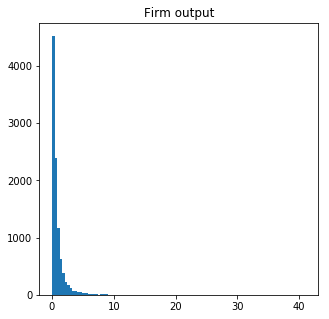

In [56]:
## 4.1
# CES is the Cobb-Douglas function for sigma = 1, so we have that s_new = np.power(a, alpha)*np.power(k, 1-alpha)
alpha = 0.5
a = s
s_new = np.power(a, alpha)*np.power(k, 1-alpha)
y = s_new*k**gamma
plt.hist(y, bins=100)
plt.title("Firm output")
plt.rcParams["figure.figsize"] = (10,6)

In [57]:
## 4.2
i=0
K = sum(k)
k_opt = [0]*10000
for i in range(10000):
    k_opt[i]= K/sum( (s_new[i]/s_new)**(1/(gamma-1)) )

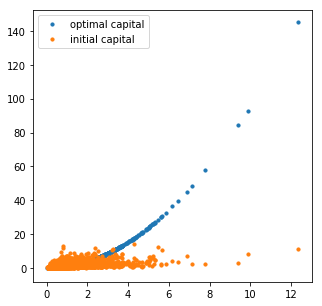

In [59]:
## 4.3
plt.scatter(s_new, k_opt,s=10, label="optimal capital")
plt.scatter(s_new, k,s=10, label="initial capital")
plt.legend()
plt.rcParams["figure.figsize"] = (5,5)

In [60]:
## 4.4
Y = sum(y)
k_opt = np.array(k_opt)
y_opt = s*k_opt**0.5
Y_opt = sum(y_opt)
gain = Y_opt/Y
gain

1.7686566663801577

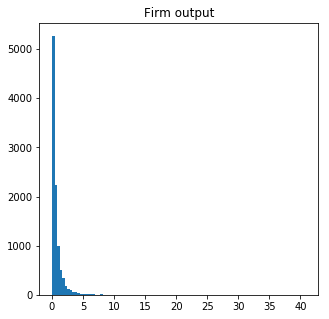

In [61]:
## 4.5

#### sigma = 0.5
# for sigma = 0.5, so we have that s_new05 = np.power(a, alpha)*np.power(k, 1-alpha)
# alpha = 0.5
s_new = (alpha/a + (1-alpha)/k)**(-1)
y = s_new*k**gamma
plt.hist(y, bins=100)
plt.title("Firm output")
plt.rcParams["figure.figsize"] = (5,5)

In [62]:
## maximization problem
i=0
K = sum(k)
k_opt = [0]*10000
for i in range(10000):
    k_opt[i]= K/ sum( (s_new[i]/s_new)**(1/(gamma-1)) )

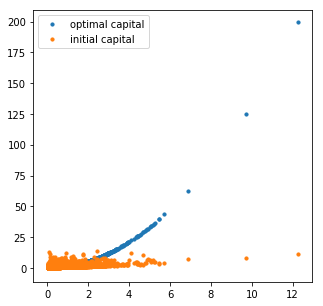

In [63]:
# optimal / initial
plt.scatter(s_new, k_opt,s=10, label="optimal capital")
plt.scatter(s_new, k,s=10, label="initial capital")
plt.legend()
plt.rcParams["figure.figsize"] = (5,5)

In [64]:
## gains 
Y = sum(y)
k_opt = np.array(k_opt)
y_opt = s*k_opt**0.5
Y_opt = sum(y_opt)
gain = Y_opt/Y
gain

1.8867172097052198

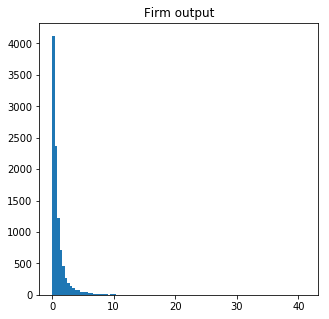

In [65]:
#### sigma = 2
# for sigma = 2, so we have that s_new2 = (alpha* a**(1/2) + (1-alpha) * k**(1/2) )**2
#alpha = 0.5
#a = s
s_new = (alpha* a**(1/2) + (1-alpha) * k**(1/2) )**2
y = s_new*k**gamma
    
plt.hist(y, bins=100)
plt.title("Firm output")
plt.rcParams["figure.figsize"] = (5,5)

In [66]:
## maximization problem
i=0
K = sum(k)
k_opt = [0]*10000
for i in range(10000):
    k_opt[i]= K/sum( (s_new[i]/s_new)**(1/(gamma-1)) )

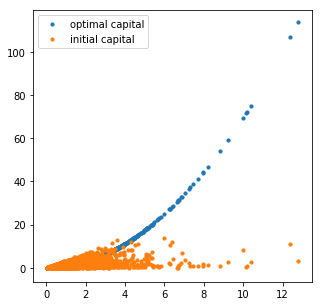

In [67]:
# optimal/ initial
plt.scatter(s_new, k_opt,s=10, label="optimal capital")
plt.scatter(s_new, k,s=10, label="initial capital")
plt.legend()
plt.rcParams["figure.figsize"] = (5,5)

In [68]:
# gains
Y = sum(y)
k_opt = np.array(k_opt)
y_opt = s*k_opt**0.5
Y_opt = sum(y_opt)
gain = Y_opt/Y
gain

1.6581758952581316

### In case of $\sigma=1$ gains are equal to 1.77, for $\sigma=0.5$ are 1.89, and for $\sigma=2$ are 1.65. Therefore we can see the higher the value of $\sigma$ the lower ouptut gains from reallocation.